In [1]:
import numpy as np
import h5py as h5
import matplotlib.pyplot as plt
import sys, os

In [2]:
sys.path.append(os.path.abspath('../'))

In [3]:
from karmma.utils import *

In [4]:
karmma_dir = '../runs/mocks/LN_mocks/all_modes/desy3_256/'

In [5]:
def get_summary(f, summ_grp):
    summary   = f[summ_grp]['summary'][:]
    bins      = f[summ_grp]['bins'][:]
    bincentre = f[summ_grp]['bin_centre'][:]
    return summary, bincentre, bins

In [24]:
with h5.File(karmma_dir + '/data/desy3_LN_mock.h5', 'r') as f:
    corr_true,      theta_bincentre, _ = get_summary(f, 'corr')
    pseudocl_true,  ell_bincentre,   _ = get_summary(f, 'pseudo_cl')
    kappa_pdf_true, kappa_bincentre, kappa_bins = get_summary(f, 'kappa_pdf')

In [7]:
corr_list     = []
pseudocl_list = []
kappapdf_list = []
crosscorr_list = []

for i in range(20):
    print("i: %d"%(i))
    with h5.File(karmma_dir + '/sample_%d.h5'%(i), 'r') as f:
        corr,       theta_bincentre, _ = get_summary(f, 'corr')
        pseudo_cl,  ell_bincentre,   _ = get_summary(f, 'pseudo_cl')
        kappa_pdf,  kappa_bincentre, _ = get_summary(f, 'kappa_pdf')
        cross_corr, theta_bincentre, _ = get_summary(f, 'cross_corr')
        
        corr_list.append(corr)
        pseudocl_list.append(pseudo_cl)
        kappapdf_list.append(kappa_pdf)
        crosscorr_list.append(cross_corr)
        
corr_arr     = np.array(corr_list)
pseudocl_arr = np.array(pseudocl_list)
kappapdf_arr = np.array(kappapdf_list)
crosscorr_arr = np.array(crosscorr_list)

i: 0
i: 1
i: 2
i: 3
i: 4
i: 5
i: 6
i: 7
i: 8
i: 9
i: 10
i: 11
i: 12
i: 13
i: 14
i: 15
i: 16
i: 17
i: 18
i: 19


In [16]:
corr_mean        = corr_arr.mean(0)
corr_lo, corr_hi = np.percentile(corr_arr, [2.5, 97.5], axis=0)

pseudocl_mean            = pseudocl_arr.mean(0)
pseudocl_lo, pseudocl_hi = np.percentile(pseudocl_arr, [2.5, 97.5], axis=0)

rad2arcmin = 180. / np.pi * 60.

bincentres = [theta_bincentre, ell_bincentre]

In [17]:
nbins = 4

In [18]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

In [19]:
savename = None

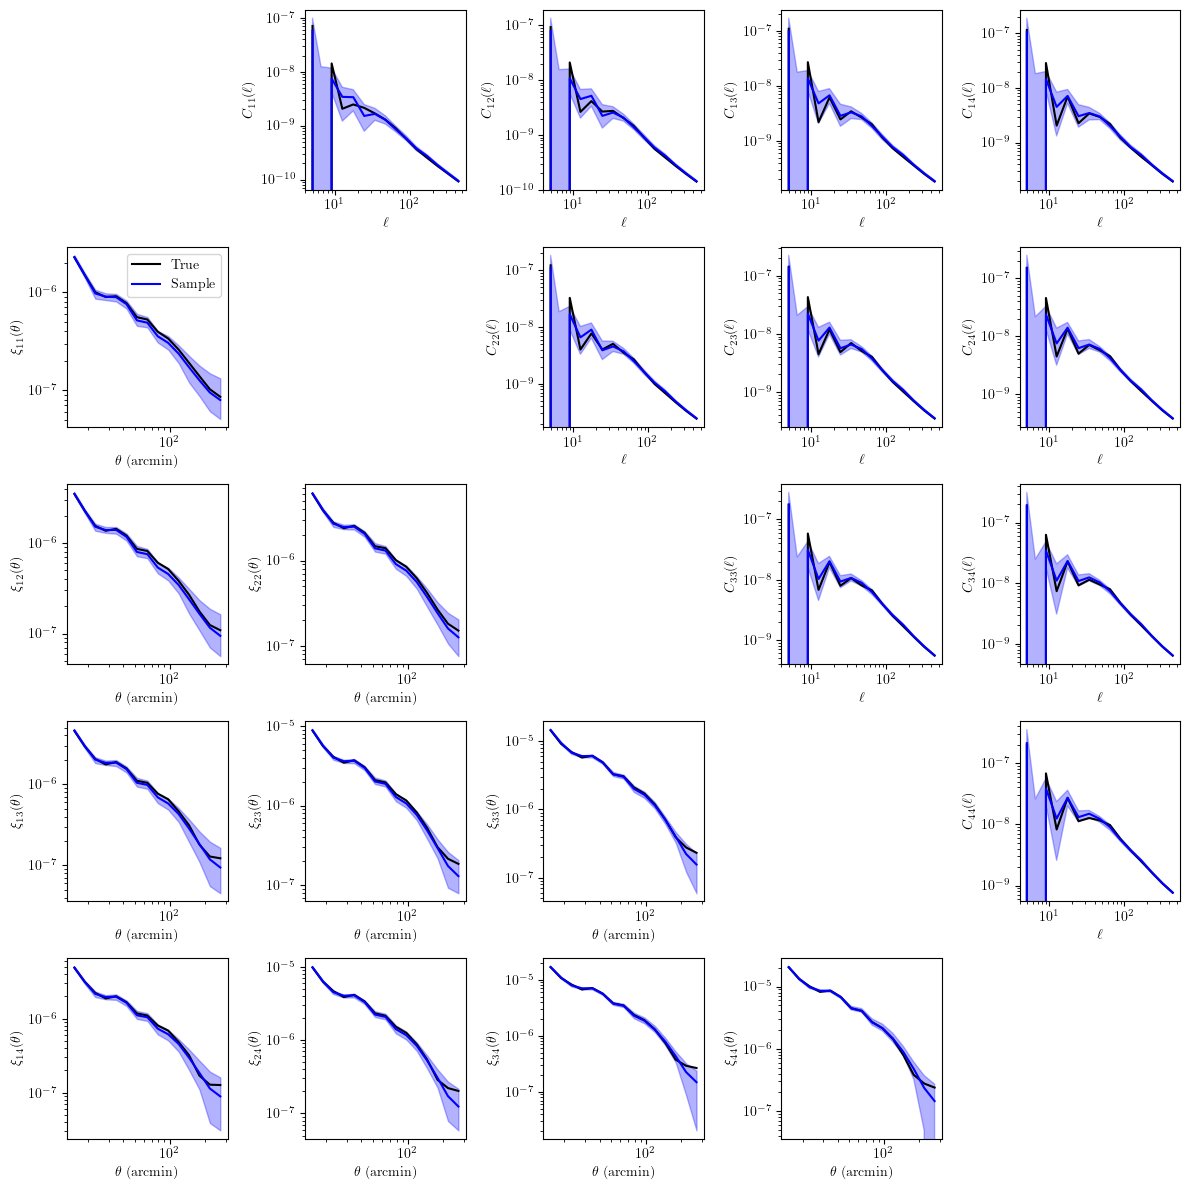

In [23]:
# savename = 'figs/summary_stats/corr_cl.pdf'
savename = 'figs/summary_stats/corr_cl.png'

plot_corr_cl(nbins, [corr_arr, pseudocl_arr], [corr_true, pseudocl_true], bincentres, savename)

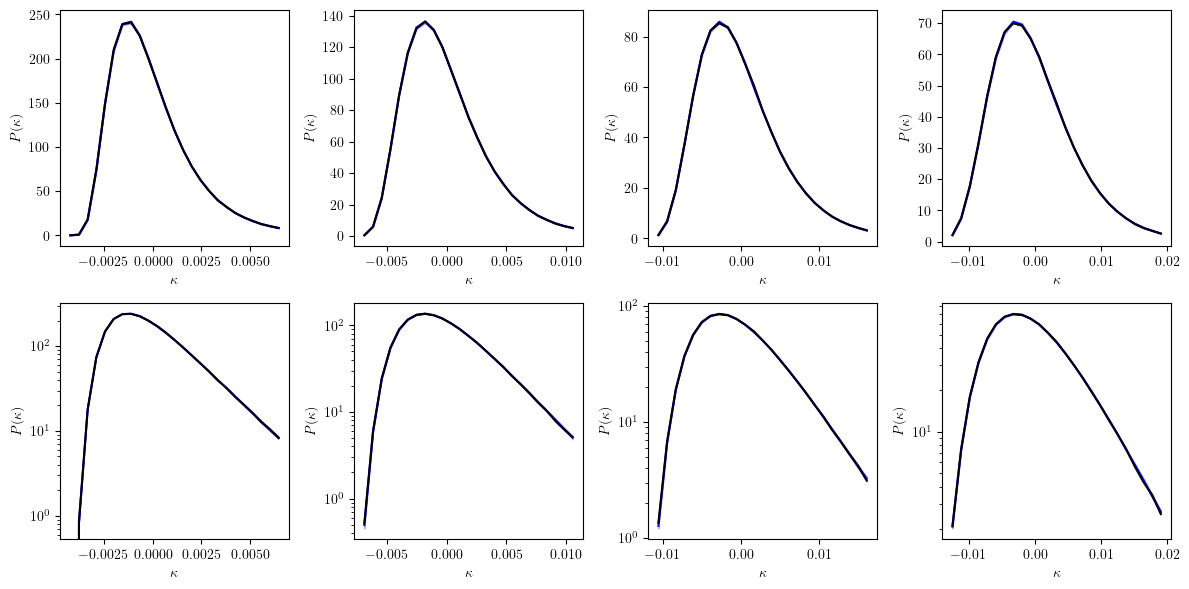

In [26]:
# kappa_bincentre = 0.5 * (kappa_bins[:,1:] + kappa_bins[:,:-1])

# savename = 'figs/summary_stats/1pt_pdf.pdf'
savename = 'figs/summary_stats/1pt_pdf.png'
plot_1pt_pdf(nbins, kappa_bincentre, kappapdf_arr, kappa_pdf_true, savename)

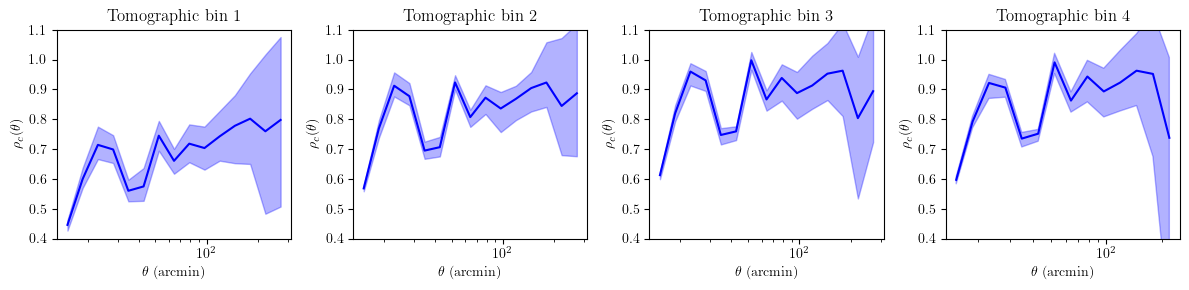

In [27]:
# savename = 'figs/summary_stats/cross_corr.pdf'

savename = 'figs/summary_stats/cross_corr.png'
plot_crosscorr(nbins, theta_bincentre, crosscorr_arr, savename)